In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_sourcefile = pd.read_excel(
    'WA_Fn-UseC_-HR-Employee-Attrition.xlsx', sheet_name=0)
print("Shape of dataframe is: {}".format(df_sourcefile.shape))
print(df_sourcefile.columns)

In [ ]:
df = df_sourcefile.copy()

In [ ]:
 for i in df.columns:
  print("unique value di kolom {}".format(i),df[i].unique(),"\n")

In [ ]:
df['Department'] = df['Department'].map( {'Sales': 0, 'Research & Development': 1, 'Human Resources':2} ).astype(int)

df['EducationField'] = df['EducationField'].map( {'Life Sciences': 0, 'Other': 1, 'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5} ).astype(int)

df['BusinessTravel'] = df['BusinessTravel'].map( {'Travel_Rarely': 0, 
                                                  'Travel_Frequently': 1, 
                                                  'Non-Travel':2} ).astype(int)

df['Attrition'] = df['Attrition'].map( {'Yes': 0,'No': 1} ).astype(int)

df['Gender'] = df['Gender'].map( {'Female': 0,'Male': 1} ).astype(int)

df['JobRole'] = df['JobRole'].map( {'Sales Executive': 0,
                                    'Research Scientist': 1, 
                                    'Laboratory Technician':2,
                                    'Manufacturing Director': 3,
                                    'Healthcare Representative': 4, 
                                    'Manager':5,
                                    'Sales Representative': 6,
                                    'Research Director': 7, 
                                    'Human Resources':8} ).astype(int)

df['MaritalStatus'] = df['MaritalStatus'].map( {'Single': 0, 
                                                'Married': 1, 
                                                'Divorced':2} ).astype(int)

df['OverTime'] = df['OverTime'].map( {'Yes': 0,'No': 1} ).astype(int)


In [ ]:
#checking result
df

In [ ]:
label = df.Attrition
label.shape

(1470,)

In [ ]:
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)

In [ ]:
categorical_column = ['Department','EducationField', 'BusinessTravel', 'Gender', 'JobRole','MaritalStatus']

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
columns = list(df.columns)
for col in columns:
    if col in categorical_column:
      print("continue")
      continue
    print(col)  
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df.head()

In [ ]:
from sklearn.model_selection import train_test_split  # import 'train_test_split'

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=2020) 
 
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1176, 30)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 30)
Number transactions y_test dataset:  (294,)


In [ ]:
a = X_train.columns.to_list()
b = X_train.columns.to_list()
dict_df = dict()
for i in range(len(a)):
  dict_df.update({a[i]:[b[i]]})
dict_df
c = pd.DataFrame(dict_df)
c

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.score(X_test, y_test)

0.8571428571428571

In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(clf, 'linear_regression.pkl')

['linear_regression.pkl']

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0,oob_score=True)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
importances = rf.feature_importances_
oob_score = rf.oob_score_
decision = rf.oob_decision_function_
print("OOB score {}".format(oob_score))
print("decision {}".format(decision.shape))

OOB score 0.8384353741496599
decision (1176, 2)


In [ ]:
print(rf.predict([X_test.iloc[0]]))
prob = rf.predict_proba([X_test.iloc[0]])
print(prob)

if np.amax(prob) > 0.8:
  print("High Risk")
elif np.amax(prob) < 0.8 and np.amax(prob) > 0.6:
  print("Medium Risk")
elif np.amax(prob) < 0.6:
  print("Low Risk")   

[1]
Low Risk


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rf, 'random_forest.pkl')

In [115]:
#LOAD MODEL
import joblib
classifier = joblib.load("random_forest.pkl")
a = classifier.predict_proba([X_test.iloc[0]])
print(a)

[[0.12405013 0.87594987]]


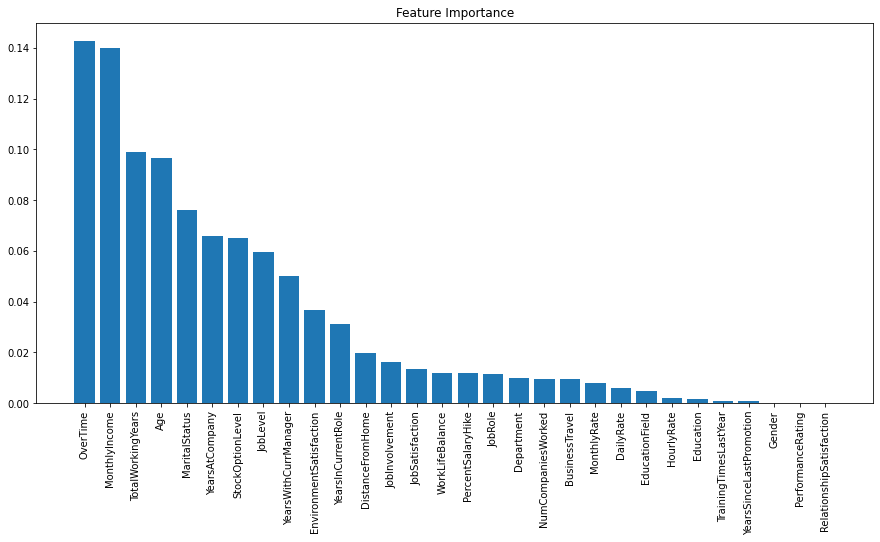

In [ ]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
X_train.to_csv("draft.csv", index=False)

In [ ]:
info = dict()
for i in df.columns:
  mean = df[i].mean()
  max = df[i].max()
  min = df[i].min()
  std = df[i].std()
  info.update({
      "{}_max".format(i):[max],
      "{}_min".format(i):[min],
      "{}_mean".format(i):[mean],
      "{}_std".format(i):[std]
  })


In [ ]:
df_info = pd.DataFrame(info)
df_info.to_csv("info.csv")
df_info

,Age max,Age min,Age mean,Age std,BusinessTravel max,BusinessTravel min,BusinessTravel mean,BusinessTravel std,DailyRate max,DailyRate min,DailyRate mean,DailyRate std,Department max,Department min,Department mean,Department std,DistanceFromHome max,DistanceFromHome min,DistanceFromHome mean,DistanceFromHome std,Education max,Education min,Education mean,Education std,EducationField max,EducationField min,EducationField mean,EducationField std,EnvironmentSatisfaction max,EnvironmentSatisfaction min,EnvironmentSatisfaction mean,EnvironmentSatisfaction std,Gender max,Gender min,Gender mean,Gender std,HourlyRate max,HourlyRate min,HourlyRate mean,HourlyRate std,...,PerformanceRating max,PerformanceRating min,PerformanceRating mean,PerformanceRating std,RelationshipSatisfaction max,RelationshipSatisfaction min,RelationshipSatisfaction mean,RelationshipSatisfaction std,StockOptionLevel max,StockOptionLevel min,StockOptionLevel mean,StockOptionLevel std,TotalWorkingYears max,TotalWorkingYears min,TotalWorkingYears mean,TotalWorkingYears std,TrainingTimesLastYear max,TrainingTimesLastYear min,TrainingTimesLastYear mean,TrainingTimesLastYear std,WorkLifeBalance max,WorkLifeBalance min,WorkLifeBalance mean,WorkLifeBalance std,YearsAtCompany max,YearsAtCompany min,YearsAtCompany mean,YearsAtCompany std,YearsInCurrentRole max,YearsInCurrentRole min,YearsInCurrentRole mean,YearsInCurrentRole std,YearsSinceLastPromotion max,YearsSinceLastPromotion min,YearsSinceLastPromotion mean,YearsSinceLastPromotion std,YearsWithCurrManager max,YearsWithCurrManager min,YearsWithCurrManager mean,YearsWithCurrManager std
0,60,18,36.92381,9.135373,2,0,0.392517,0.665455,1499,102,802.485714,403.5091,2,0,0.739456,0.527792,29,1,9.192517,8.106864,5,1,2.912925,1.024165,5,0,1.462585,1.43178,4,1,2.721769,1.093082,1,0,0.6,0.490065,100,30,65.891156,20.329428,...,4,3,3.153741,0.360824,4,1,2.712245,1.081209,3,0,0.793878,0.852077,40,0,11.279592,7.780782,6,0,2.79932,1.289271,4,1,2.761224,0.706476,40,0,7.008163,6.126525,18,0,4.229252,3.623137,15,0,2.187755,3.22243,17,0,4.123129,3.568136


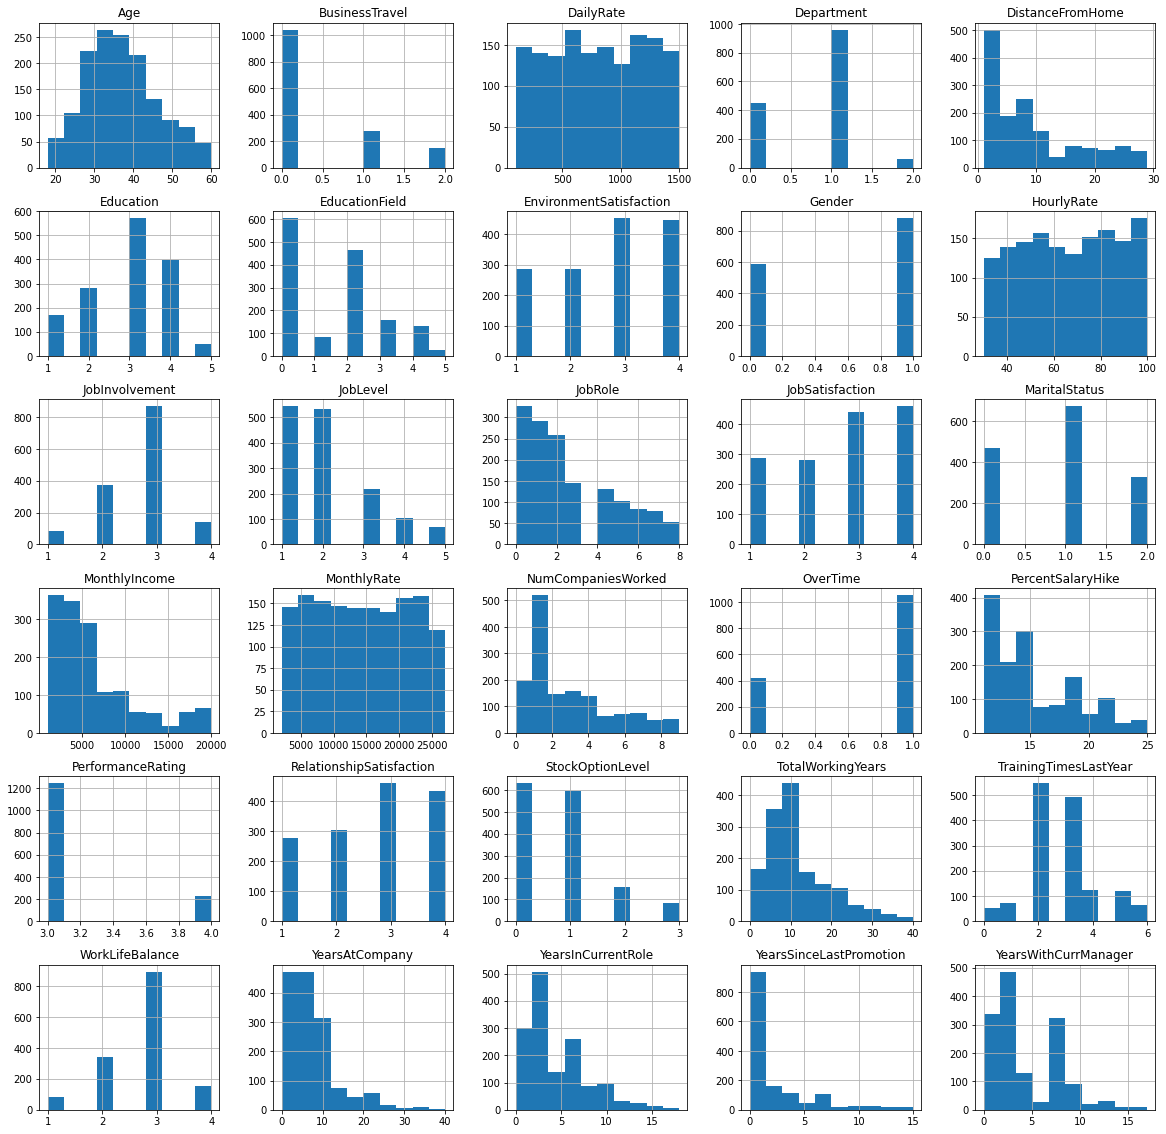

In [ ]:
bar_plot = df.hist(figsize=(20,20))

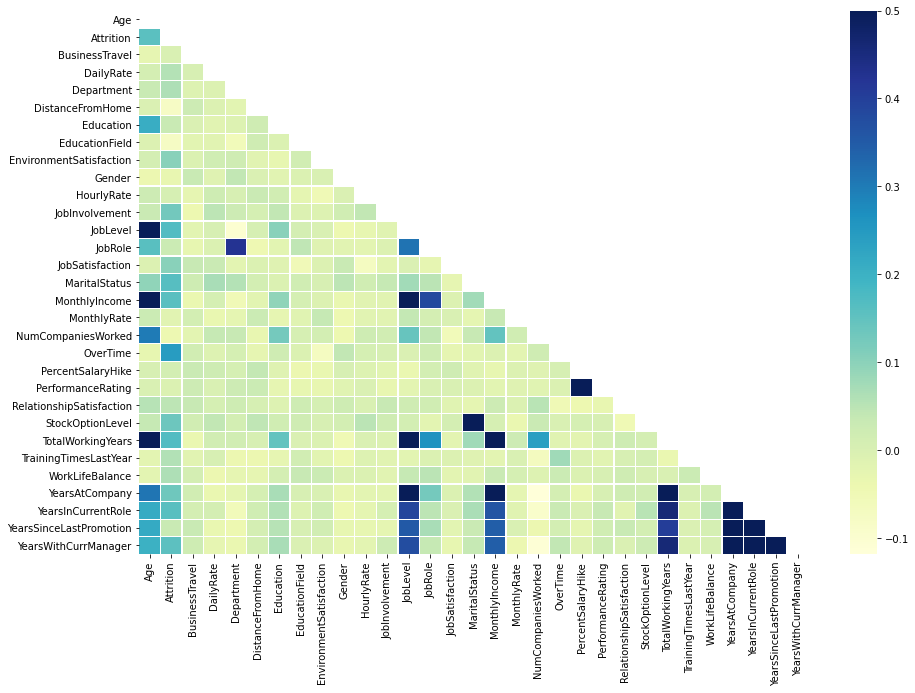

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlations
#df['Attrition'] = df['Attrition'].map( {'Yes': 0,'No': 1} ).astype(int)

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

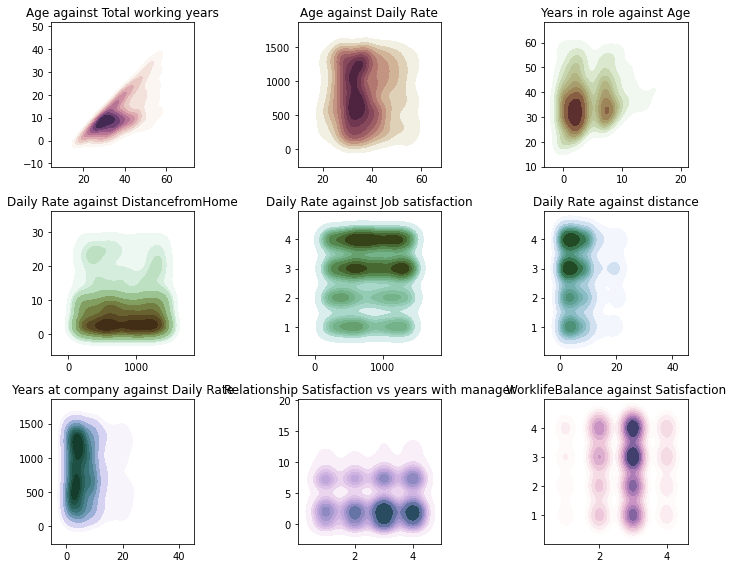

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['Age'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [ ]:
df.to_csv("visualisasi.csv",index=False)